## Feature Selection: Correlation

**Correlation** of a variable tells that how is that variable related to the target. If the correlation between a variable and the target is "1", this means they are highly correlated and are bound by direct proportionality i.e. if variable value increases, the target value increases.

If the correlation between the variable and the target is "-1",this means they are inversely correlated i.e. they are bound by an inverse relation i.e. if the value of the variable increases, the value for the target decreases.

It is good to have a high correlation between the variable/feature and the target but not of much importance between two variables/features and in that cases, if we know one variable/feature, we can get the other by correlation.

In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Load Dataset
df = pd.read_csv('./Paribas-Cardif-Claim-Data/train.csv', nrows=50000)
df.shape

(50000, 133)

In [3]:
df.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [4]:
# Get Numerical features from dataset
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [5]:
data = df[numerical_features]

In [6]:
data.shape

(50000, 114)

In [7]:
data.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [8]:
X = data.drop(['target', 'ID'], axis=1)
X.shape

(50000, 112)

In [9]:
y = data['target']
y.shape

(50000,)

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35000, 112), (35000,), (15000, 112), (15000,))

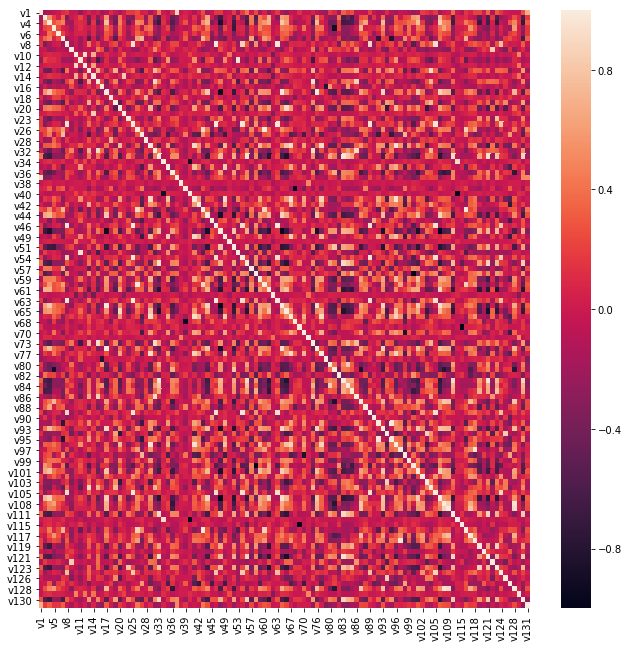

In [11]:
# Visualize Correlated Features
corr = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr)

### Brute Force Method to Find Correlated Features

In [14]:
# Brute Force Method to find Correlation between features
def correlation(data, threshold=None):
    # Set of all names of correlated columns
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (abs(corr_mat.iloc[i,j]) > threshold):
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
correlated_features = correlation(data=X_train, threshold=0.8)
len(set(correlated_features))

54

The above function shows that 54 features are correlated with the other features in the dataset. So, we drop these features.

In [16]:
X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

X_train.shape, X_test.shape

c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\hare krishna\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


((35000, 58), (15000, 58))

### Calculating Groups of Higly Correlated Features

In [17]:
# Load Dataset
df = pd.read_csv('./Paribas-Cardif-Claim-Data/train.csv', nrows=50000)
df.shape

(50000, 133)

In [18]:
# Get Numerical features from dataset
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [19]:
data = df[numerical_features]

In [20]:
data.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [21]:
X = data.drop(['target', 'ID'], axis=1)
X.shape

(50000, 112)

In [22]:
y = data['target']
y.shape

(50000,)

In [23]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35000, 112), (35000,), (15000, 112), (15000,))

In [24]:
# Build a Dataframe with Correlation between Features
corr_matrix = X_train.corr()
# Take absolute values of correlated coefficients
corr_matrix = corr_matrix.abs().unstack()
corr_matrix = corr_matrix.sort_values(ascending=False)
# Take only features with correlation above threshold of 0.8
corr_matrix = corr_matrix[corr_matrix >= 0.8]
corr_matrix = corr_matrix[corr_matrix < 1]
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ['feature1', 'feature2', 'Correlation']
corr_matrix.head()

,feature1,feature2,Correlation
0,v100,v58,0.997879
1,v58,v100,0.997879
2,v115,v69,0.993563
3,v69,v115,0.993563
4,v76,v17,0.992257


In [25]:
# Get groups of features that are correlated amongs themselves
grouped_features = []
correlated_groups = []

for feature in corr_matrix.feature1.unique():
    if feature not in grouped_features:
        # Find all features correlated to a single feature
        correlated_block = corr_matrix[corr_matrix.feature1 == feature]
        grouped_features = grouped_features + list(correlated_block.feature2.unique()) + [feature]
        
        # Append block of features to the list
        correlated_groups.append(correlated_block)

print('Found {} correlated feature groups'.format(len(correlated_groups)))
print('out of {} total features.'.format(X_train.shape[1]))

Found 30 correlated feature groups
out of 112 total features.


In [26]:
# Visualize Correlated Feature Groups
for group in correlated_groups:
    print(group)
    print('\n')

  feature1 feature2  Correlation
0     v100      v58     0.997879


  feature1 feature2  Correlation
2     v115      v69     0.993563


    feature1 feature2  Correlation
4        v76      v17     0.992257
51       v76      v64     0.952077
145      v76      v93     0.876672
164      v76      v48     0.863382


   feature1 feature2  Correlation
6       v46      v63     0.991704
8       v46      v25     0.982463
24      v46       v8     0.975372
58      v46     v105     0.945270
70      v46      v89     0.935300
91      v46      v54     0.921074


    feature1 feature2  Correlation
15      v106      v48     0.981408
76      v106      v64     0.932641
148     v106      v44     0.874180
169     v106      v61     0.861864
181     v106      v17     0.855274
188     v106       v4     0.844129
205     v106     v101     0.836028


    feature1 feature2  Correlation
16       v60      v26     0.980199
147      v60      v43     0.876360
178      v60     v116     0.856916


    feature1 feature2  

In the tables above, we get the correlation values for the features and see that howthey are correlated to each other along with their correlation value. Now the question is which one of the features to remove and which to keep? To decide that, we can look at the groups individually and keep the group with the highest correlation and least amount of missing data.

In [27]:
# Investigating features further within one group
group = correlated_groups[3]
group

,feature1,feature2,Correlation
6,v46,v63,0.991704
8,v46,v25,0.982463
24,v46,v8,0.975372
58,v46,v105,0.945270
70,v46,v89,0.935300
91,v46,v54,0.921074


In [28]:
# Select features with less missing data
for features in list(group.feature2.unique()) + ['v17']:
    print(X_train[feature].isnull().sum())

15252
15252
15252
15252
15252
15252
15252


Since, all of the features contain the same amount of missing data, so this might not be the best way to decide which feature to keep. So, we use RFC for this. Using Random Forest Classifier, we find out the features that are most predictive and select that.

In [29]:
from sklearn.ensemble import RandomForestClassifier

features = list(group.feature2.unique()) + ['v17']
rfc = RandomForestClassifier(n_estimators=20, random_state=101, max_depth=4)
rfc.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [30]:
# Get Feature Importance using RFC
importance = pd.concat([pd.Series(features), pd.Series(rfc.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

,feature,importance
6,v17,0.229342
2,v8,0.178029
3,v105,0.139498
5,v54,0.128159
0,v63,0.125523
1,v25,0.110469
4,v89,0.088979


From above table, we can see that v17 does the best job and hence we'll select that and remove the rest of the features.